**[photutils.profiles](https://photutils.readthedocs.io/en/stable/profiles.html)**  
@author: Rui Zhu  
@creation time: 2023-05-27

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image

from astrokit.plot import imshow

## 创建实验用图
* 输入的图像必须是background-subtracted

<Axes: >

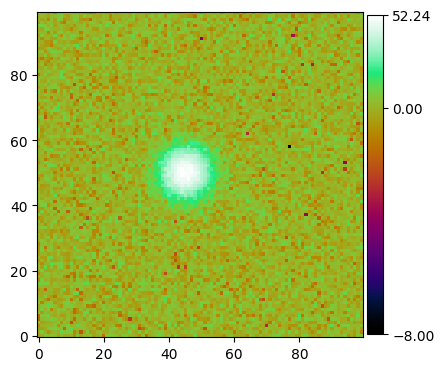

In [23]:
gmodel = Gaussian2D(amplitude=50, 
                    x_mean=45, y_mean=50, 
                    x_stddev=4.7, y_stddev=4.7,
                    theta=0)
yy, xx = np.mgrid[0:100, 0:100]
data = gmodel(xx, yy)
error = make_noise_image(data.shape, mean=0, stddev=2.04, seed=123)
data = data + error
imshow(data)

## 绘制radial profile

使用[centroid_quadratic](https://photutils.readthedocs.io/en/stable/api/photutils.centroids.centroid_quadratic.html#photutils.centroids.centroid_quadratic)计算质心的中心位置



In [24]:
from photutils.centroids import centroid_quadratic
xy_center = centroid_quadratic(data)
xy_center

array([45.01555868, 49.98686462])

使用[RadialProfile](https://photutils.readthedocs.io/en/stable/api/photutils.profiles.RadialProfile.html#photutils.profiles.RadialProfile)计算radial profile

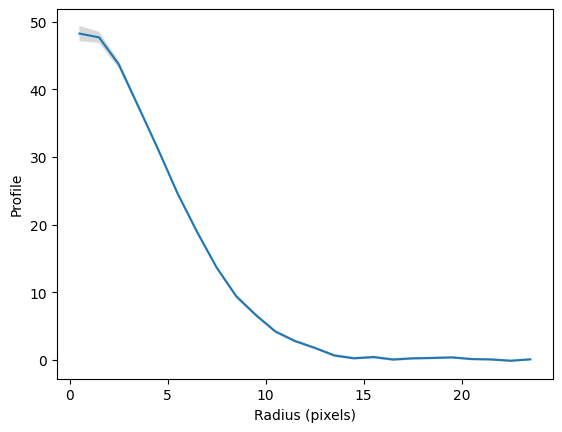

In [27]:
from photutils.profiles import RadialProfile
edge_radii = np.arange(25)
rp = RadialProfile(data, xycen=xy_center, radii=edge_radii, 
                   error=error)

rp.plot(label='Radial Profile')
rp.plot_error()

在图像上绘制孔径

(<matplotlib.patches.PathPatch at 0x16c9ae4d0>,)

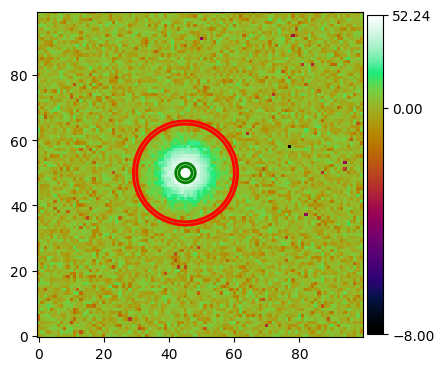

In [26]:
imshow(data)
rp.apertures[2].plot(color='green', lw=2)
rp.apertures[15].plot(color='red', lw=2)

使用Gaussian Model to fit the data

11.057864901737855


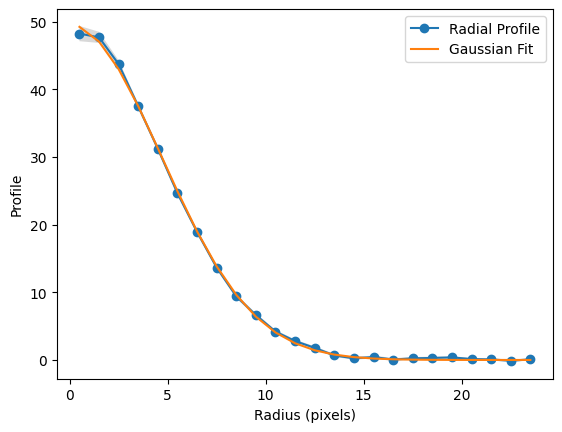

In [33]:
edge_radii = np.arange(25)
rp = RadialProfile(data, xycen=xy_center, radii=edge_radii, 
                   error=error)

rp.plot(label='Radial Profile', marker='o')
rp.plot_error()
plt.plot(rp.radius, rp.gaussian_profile, label='Gaussian Fit')
plt.legend()
print(rp.gaussian_fwhm)

## 绘制Curve of Growth
* 使用类[CurveOfGrowth](https://photutils.readthedocs.io/en/stable/api/photutils.profiles.CurveOfGrowth.html#photutils.profiles.CurveOfGrowth)

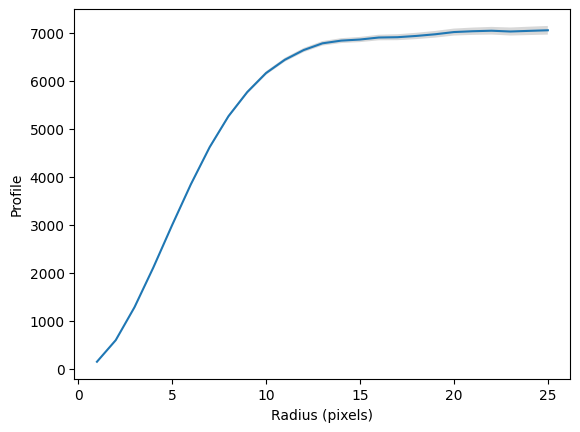

In [36]:
from photutils.profiles import CurveOfGrowth
radii = np.arange(1, 26)
cog = CurveOfGrowth(data=data, xycen=xy_center, radii=radii, error=error, 
                    mask=None)
cog.plot()
cog.plot_error()

(<matplotlib.patches.Circle at 0x16cd98890>,)

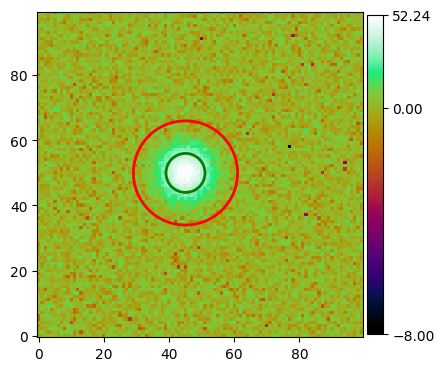

In [37]:
# 绘制其中一些孔径
imshow(data)
cog.apertures[5].plot(color='green', lw=2)
cog.apertures[15].plot(color='red', lw=2)